In [ ]:
#Name: Uday

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from collections import Counter
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Public\Womens_Clothing_E-Commerce_Reviews.csv')

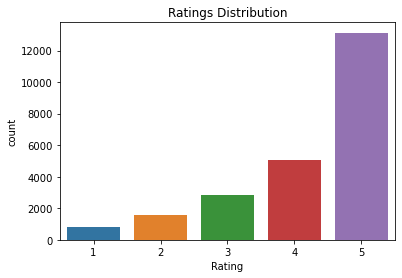

In [8]:
# A bar plot of the ratings distribution
sns.countplot(x='Rating', data=df)
plt.title('Ratings Distribution')
plt.show()

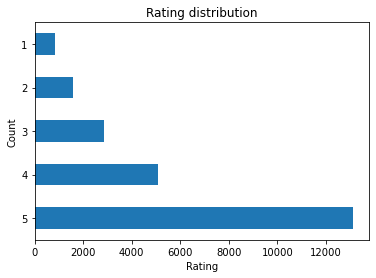

In [10]:
# A bar Chart of the ratings distribution
rating_counts = df['Rating'].value_counts()
rating_counts.plot(kind='barh')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating distribution')
plt.show()

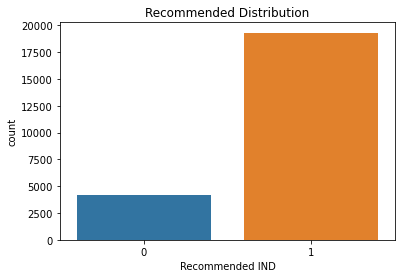

In [9]:
# A histogram of the recommended distribution
sns.countplot(x='Recommended IND', data=df)
plt.title('Recommended Distribution')
plt.show()

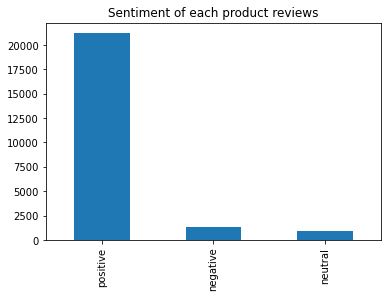

In [19]:
# sentiment analysis on product reviews 
def sentiment_chk_fun(review):
    blob = TextBlob(str(review))
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['Review Text'].apply(sentiment_chk_fun)
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment of each product reviews')
plt.show()

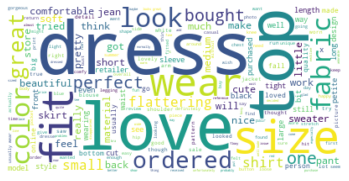

In [20]:
# Logic for word cloud
reviews = ' '.join(df['Review Text'].astype(str))
wordcloud = WordCloud(background_color='white').generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# TF-IDF for the reviews
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Review Text'].values.astype('U'))
print("TF-IDF for the reviews :", tfidf_matrix.shape)

TF-IDF for the reviews : (23486, 13856)


In [24]:
# Topic modelling on the reviews
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_matrix)

for topic_idx, topic in enumerate(lda.components_):
    print(f'Topic {topic_idx+1}: {" ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]])}')

Topic 1: like dress love waist look just fit cute fabric socks
Topic 2: sheds lazy unraveling lint fir border title shedding workplace pom
Topic 3: love great dress comfortable color wear soft fits flattering perfect
Topic 4: love dress great wear size fit perfect like jeans just
Topic 5: size dress small like fit just large ordered love really
Topic 6: nan cheerful priced 113 upside reasonably breath 138lbs blocking exposing
Topic 7: gift culottes cleaned moo stain fray dry beaded lacey cocoon
Topic 8: dress size like fabric fit just love ordered small suit
Topic 9: strangers thanksgiving dress favorite simplicity fashionable staples breasted confortable loads
Topic 10: bridal shower exciting caftan plane tumble bothersome melon attending growing


In [26]:
# logic for Text Classification:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'].astype(str), df['Rating'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.16      0.19       153
           2       0.32      0.20      0.25       317
           3       0.40      0.31      0.35       620
           4       0.40      0.30      0.34      1017
           5       0.73      0.89      0.80      2591

    accuracy                           0.61      4698
   macro avg       0.42      0.37      0.39      4698
weighted avg       0.57      0.61      0.58      4698



In [28]:
# Named entity recognition of reviews text
def named_entity(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    entities = []
    for chunk in chunked:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            entities.append(' '.join(c[0] for c in chunk))
    return entities

entities = []
for text in df['Review Text']:
    entities += named_entity(str(text))
entity_counts = Counter(entities)
for entity, count in entity_counts.most_common(1):
    print(entity, count)

In [29]:
# The length of each review
df['Review Length'] = df['Review Text'].str.len()
print(f'Average review text length: {df["Review Length"].mean():.2f} characters')

Average review text length: 308.69 characters
